<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# modify global setting
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 15

In [32]:
plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["legend.markerscale"] = 0.0

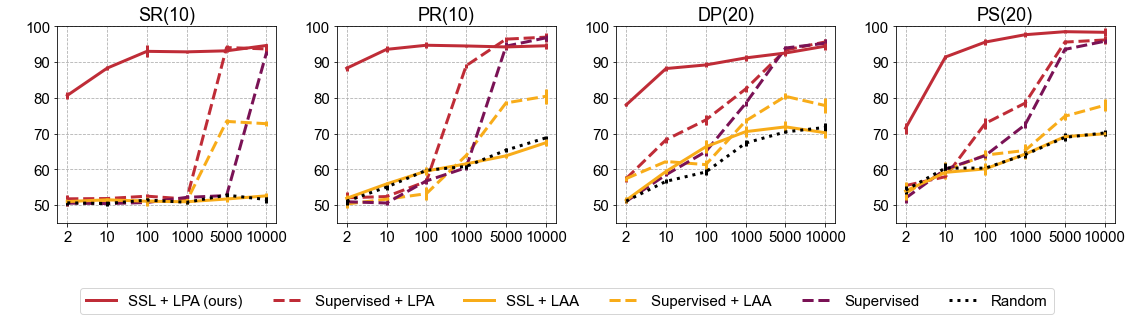

In [35]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)

x = range(6)
label = [2, 10, 100, 1000, 5000, 10000]

def draw(ax, supervised, supervised_lpa, supervised_laa, ssl_laa, ssl_lpa, random, title):
    supervised_mean = np.array(supervised).reshape(((-1, 3))).mean(-1)
    supervised_lpa_mean = np.array(supervised_lpa).reshape(((-1, 3))).mean(-1)
    supervised_laa_mean = np.array(supervised_laa).reshape(((-1, 3))).mean(-1)
    ssl_laa_mean = np.array(ssl_laa).reshape(((-1, 3))).mean(-1)
    ssl_lpa_mean = np.array(ssl_lpa).reshape(((-1, 3))).mean(-1)
    random_mean = np.array(random).reshape(((-1, 3))).mean(-1)
    
    supervised_std = np.array(supervised).reshape(((-1, 3))).std(-1)
    supervised_lpa_std = np.array(supervised_lpa).reshape(((-1, 3))).std(-1)
    supervised_laa_std = np.array(supervised_laa).reshape(((-1, 3))).std(-1)
    ssl_laa_std = np.array(ssl_laa).reshape(((-1, 3))).std(-1)
    ssl_lpa_std = np.array(ssl_lpa).reshape(((-1, 3))).std(-1)
    random_std = np.array(random).reshape(((-1, 3))).std(-1)
    
    ax.errorbar(x, ssl_lpa_mean,        yerr = ssl_lpa_std, zorder=10,  markersize=8, markeredgewidth=2, linestyle='-', linewidth=3, color='#BF2C37', label = "SSL + LPA (ours)")
    ax.errorbar(x, supervised_lpa_mean, yerr = supervised_lpa_std, zorder=5, markersize=8, markeredgewidth=2, linestyle='--', color='#BF2C37', linewidth=3, label = "Supervised + LPA")

    ax.errorbar(x, ssl_laa_mean,        yerr = ssl_laa_std, zorder=10, markersize=8, markeredgewidth=2, linestyle='-', linewidth=3, color='#F8AC19', label = "SSL + LAA")
    ax.errorbar(x, supervised_laa_mean, yerr = supervised_laa_std, zorder=5, markersize=8, markeredgewidth=2, linestyle='--', color='#F8AC19', linewidth=3, label = "Supervised + LAA")

    ax.errorbar(x, supervised_mean,     yerr = supervised_std, zorder=5, markersize=8, markeredgewidth=2, linestyle='--', color='#7A1255', linewidth=3, label = "Supervised")
    ax.errorbar(x, random_mean,         yerr = random_std, zorder=10, markersize=8, markeredgewidth=2, linestyle=':', linewidth=3, color='#000000', label = "Random")
    
    ax.grid(True, linestyle="--")
    ax.set_title(title)

# SR(10)
supervised = [49.52, 51.26, 50.83, 50.05, 50.52, 50.65, 50.04, 51.09, 50.98, 51.15, 52.51, 52.76, 53.76, 52.98, 51.2,  91.72, 92.65, 93.21]
supervised_lpa = [52.25, 50.08, 52.87, 52.18, 51.26, 52.01, 53.16, 52.65, 51.62, 52.67, 52.15, 50.21, 94.55, 93.25, 94.37, 94.32, 92.16, 94.52]
supervised_laa = [51.52, 49.17, 51.26, 51.87, 52.06, 49.81, 50.65, 51.24, 51.31, 52.32, 50.92, 50.15, 72.45, 73.48, 74.25, 71.82, 73.27, 73.16]
ssl_lpa = [80.81, 79.53, 81.65, 88.93, 88.32, 87.62, 92.23, 95.31, 91.45, 92.65, 93.12, 92.78, 92.88, 93.01, 93.53, 94.61, 95.12, 94.16]
ssl_laa = [50.7,  51.25, 50.96, 50.71, 51.65, 52.03, 49.93, 50.37, 52.87, 50.72, 51.26, 50.75, 50.93, 51.26, 52.87, 51.8,  52.32, 53.59]
random = [49.89, 51.32, 50.64, 50.23, 49.82, 51.21, 51.35, 52.04, 50.75, 50.38, 50.52, 51.42, 52.56, 53.52, 52.18, 52.76, 50.63, 51.26]
draw(ax1, supervised, supervised_lpa, supervised_laa, ssl_laa, ssl_lpa, random, "SR(10)")

# PR(10)
supervised = [50.52, 51.25, 50.98, 50.2,  51.23, 50.26, 56.1,  57.79, 56.33, 59.9,  60.21, 61.23, 95.6,  94.72, 93.01, 96,  96.37, 97.94]
supervised_lpa = [49.95, 52.36, 53.76, 51.6,  52.31, 53.21, 56.45, 56.48, 56.91, 89.25, 88.27, 89.44, 97.3,  96.26, 95.67, 97.5,  98.13, 95.26]
supervised_laa = [50.92, 51.23, 48.72, 51.95, 50.91, 52.03, 53.55, 50.78, 55.21, 64.35, 63.29, 64.02, 78.87, 77.81, 79.02, 82.37, 81.36, 77.52]
ssl_lpa = [88.65, 87.23, 88.92, 94.3,  92.35, 93.99, 94.15, 95.88, 94.07, 94.43, 95.02, 94.05, 94.7,  94.62, 93.36, 95.02, 95.21, 93.43]
ssl_laa = [50.68, 52.98, 52.01, 55.67, 56.75, 55.27, 59.93, 57.82, 60.81, 60.95, 61.27, 62.35, 63.55, 64.52, 63.21, 67.4,  68.55, 66.32]
random = [49.87, 52.65, 50.72, 54.62, 54.38, 56.01, 60.06, 59.29, 59.82, 61.23, 59.88, 61.27, 64.92, 65.03, 66.08, 68.31, 69.29, 68.76]
draw(ax2, supervised, supervised_lpa, supervised_laa, ssl_laa, ssl_lpa, random, "PR(10)")

# DP(20)
supervised = [50.52, 51.23, 51.33, 58.65, 58.01, 58.73, 63.32, 65.21, 66.31, 78.2,  77.62, 79.42, 93.12, 94.62, 94.03, 95.65, 96.41, 93.72]
supervised_lpa = [58.55, 56.62, 56.99, 67.14, 68.24, 69.37, 72.55, 75.65, 73.21, 81.25, 82.83, 83.29, 92.87, 93.52, 93.64, 94.83, 95.32, 96.72]
supervised_laa = [56.65, 57.26, 58.26, 61.73, 62.35, 62.45, 59.85, 62.81, 61.26, 73.62, 72.61, 74.36, 81.35, 79.35, 80.53, 78.62, 79.81, 75.04]
ssl_lpa = [78.51, 77.51, 78.02, 87.46, 88.21, 88.87, 89.28, 90.01, 88.29, 90.58, 90.51, 92.37, 91.85, 93.52, 92.21, 93.3,  95.62, 94.38]
ssl_laa = [50.43, 51.27, 52.32, 58.35, 59.61, 60.23, 64.11, 66.37, 68.42, 68.82, 70.26, 72.51, 69.72, 72.64, 73.24, 70.02, 72.14, 68.53]
random = [51.22, 50.82, 51.29, 56.23, 57.38, 56.27, 60.25, 58.23, 59.25, 66.15, 68.23, 67.63, 69.92, 70.83, 70.62, 72.35, 69.83, 72.96]
draw(ax3, supervised, supervised_lpa, supervised_laa, ssl_laa, ssl_lpa, random, "DP(20)")

# PS(20)
supervised = [52.6,  50.01, 53.21, 58.45, 60.25, 61.36, 64.57, 63.21, 63.72, 71.05, 72.87, 73.41, 93.05, 94.32, 93.26, 95.62, 96.62, 95.23]
supervised_lpa = [54.45, 55.62, 56.23, 58.1,  57.42, 58.25, 70.82, 72.98, 74.72, 78.05, 79.95, 77.52, 95.23, 96.31, 95.21, 97.92, 95.31, 95.31]
supervised_laa = [53.68, 52.42, 54.02, 61.78, 56.37, 60.72, 64.25, 65.55, 62.12, 67.42, 65.27, 63.09, 76.05, 73.82, 74.66, 78.56, 79.53, 75.62]
ssl_lpa = [71.17, 69.87, 73.53, 91.4,  90.83, 92,  95.11, 96.81, 94.84, 97.98, 98.23, 96.73, 98.45, 99.02, 98.02, 98.8,  99.42, 96.74]
ssl_laa = [56.71, 50.62, 54.44, 59.17, 60.04, 58.21, 59.17, 58.62, 62.53, 65.53, 62.34, 64.87, 68.82, 70.32, 68.23, 69.21, 70.26, 70.34]
random = [55.73, 53.51, 53.26, 58.73, 59.99, 62.32, 60.52, 60.61, 59.81, 63.65, 65.42, 63.21, 69.13, 67.43, 70.23, 70.35, 71.24, 68.93]
draw(ax4, supervised, supervised_lpa, supervised_laa, ssl_laa, ssl_lpa, random, "PS(20)")

fontsize=15
ax1.set_ylabel(" ", fontsize=fontsize)
ax1.set_xticks(np.arange(6))
ax1.set_xticklabels(label, fontsize=fontsize)
ax1.tick_params(labelsize=fontsize)
ax1.set_ylim(45, 100)
# ax1.ticklabel_format(useMathText=True)

ax2.set_xticks(np.arange(6))
ax2.set_xticklabels(label, fontsize=fontsize)
ax2.tick_params(labelsize=fontsize)
ax2.set_ylim(45, 100)

ax3.set_xticks(np.arange(6))
ax3.tick_params(labelsize=fontsize)
ax3.set_xticklabels(label, fontsize=fontsize)
ax3.set_ylim(45, 100)

ax4.set_xticks(np.arange(6))
ax4.tick_params(labelsize=fontsize)
ax4.set_xticklabels(label, fontsize=fontsize)
ax4.set_ylim(45, 100)

ax1.set_xlabel(" ", fontsize=fontsize)
ax2.set_xlabel(" ", fontsize=fontsize)
ax3.set_xlabel(" ", fontsize=fontsize)
ax4.set_xlabel(" ", fontsize=fontsize)

handles, labels = ax4.get_legend_handles_labels()
handles = [h[0] for h in handles]
fig.tight_layout()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=[+0.5, -0.15], ncol=6, prop={'size': 15})
plt.savefig("linear_evaluation_result.pdf", bbox_inches='tight')
plt.show()


In [4]:
supervised = [49.52, 51.26, 50.83, 50.05, 50.52, 50.65, 50.04, 51.09, 50.98, 51.15, 52.51, 52.76, 53.76, 52.98, 51.2,  91.72, 92.65, 93.21]
supervised_lpa = [52.25, 50.08, 52.87, 52.18, 51.26, 52.01, 53.16, 52.65, 51.62, 52.67, 52.15, 50.21, 94.55, 93.25, 94.37, 94.32, 92.16, 94.52]
supervised_laa = [51.52, 49.17, 51.26, 51.87, 52.06, 49.81, 50.65, 51.24, 51.31, 52.32, 50.92, 50.15, 72.45, 73.48, 74.25, 71.82, 73.27, 73.16]
ssl_laa = [80.81, 79.53, 81.65, 88.93, 88.32, 87.62, 92.23, 95.31, 91.45, 92.65, 93.12, 92.78, 92.88, 93.01, 93.53, 94.61, 95.12, 94.16]
ssl_lpa = [50.7,  51.25, 50.96, 50.71, 51.65, 52.03, 49.93, 50.37, 52.87, 50.72, 51.26, 50.75, 50.93, 51.26, 52.87, 51.8,  52.32, 53.59]
random = [49.89, 51.32, 50.64, 50.23, 49.82, 51.21, 51.35, 52.04, 50.75, 50.38, 50.52, 51.42, 52.56, 53.52, 52.18, 52.76, 50.63, 51.26]

supervised_mean = np.array(supervised).reshape(((-1, 3)))
supervised_lpa_mean = np.array(supervised_lpa).reshape(((-1, 3)))
supervised_laa_mean = np.array(supervised_laa).reshape(((-1, 3)))
ssl_laa_mean = np.array(ssl_laa).reshape(((-1, 3)))
ssl_lpa_mean = np.array(ssl_lpa).reshape(((-1, 3)))
random_mean = np.array(random).reshape(((-1, 3)))

In [10]:
supervised_mean.std(-1)

array([0.74001501, 0.25772509, 0.47119234, 0.70743669, 1.07136465,
       0.61450974])